Table format:
TABLE aarhus2:

status,extid,ts,avgMeasuredTime,avgSpeed,medianMeasuredTime,vehicleCount,id,report_id
    
PRIMARY KEY((status,extid,quantum(ts,30,'d')),status,extid,ts))

In [1]:
from riak import RiakClient
from datetime import datetime
import calendar
import csv
def changetime(stime):
            dt=datetime.strptime(stime,'%Y-%m-%dT%H:%M:%S')
            #print dt
            return calendar.timegm(datetime.timetuple(dt))*1000
            
c=RiakClient()
c.ping()

/home/stephen/aarhus/local/lib/python2.7/site-packages/riak/security.py:45: UserWarning: OpenSSL 1.0.1f 6 Jan 2014 (>= 1.0.1g required), TLS 1.2 support: False
  warnings.warn(msg, UserWarning)


True

In [2]:
startdate=changetime('2014-02-13T00:00:00')
enddate=changetime('2014-04-12T00:00:00')

print startdate, enddate

1392249600000 1397260800000


In [3]:
q="""
    select count(*)  from aarhus2 where ts > {t1} and ts < {t2} and status='OK' and extid='668'
"""
query=q.format(t1=startdate, t2=enddate)
print query
ds=c.ts_query('aarhus2', query)
#print ds

#for r in range(0,10):
#    print ds.rows[r]

#print len(ds.rows)
print ds.rows


    select count(*)  from aarhus2 where ts > 1392249600000 and ts < 1397260800000 and status='OK' and extid='668'

[[15848L]]


In [4]:
q="""
    select *  from aarhus2 where ts > {t1} and ts < {t2} and status='OK' and extid='668'
"""
query=q.format(t1=startdate, t2=enddate)
#print query
ds1=c.ts_query('aarhus2', query)
#print ds

#for r in range(0,10):
#    print ds.rows[r]

#print len(ds.rows)
for r in range (0,10):
    print ds1.rows[r]

['OK', '668', datetime.datetime(2014, 2, 13, 11, 30), 66L, 56L, 66L, 7L, 190000L, 158324L]
['OK', '668', datetime.datetime(2014, 2, 13, 11, 35), 69L, 53L, 69L, 5L, 190449L, 158324L]
['OK', '668', datetime.datetime(2014, 2, 13, 11, 40), 69L, 53L, 69L, 6L, 190898L, 158324L]
['OK', '668', datetime.datetime(2014, 2, 13, 11, 45), 70L, 52L, 70L, 3L, 191347L, 158324L]
['OK', '668', datetime.datetime(2014, 2, 13, 11, 50), 64L, 57L, 64L, 6L, 191796L, 158324L]
['OK', '668', datetime.datetime(2014, 2, 13, 11, 55), 75L, 49L, 75L, 9L, 192245L, 158324L]
['OK', '668', datetime.datetime(2014, 2, 13, 12, 0), 73L, 50L, 73L, 11L, 192694L, 158324L]
['OK', '668', datetime.datetime(2014, 2, 13, 12, 5), 59L, 62L, 59L, 8L, 193143L, 158324L]
['OK', '668', datetime.datetime(2014, 2, 13, 12, 10), 61L, 60L, 61L, 10L, 193592L, 158324L]
['OK', '668', datetime.datetime(2014, 2, 13, 12, 15), 63L, 58L, 63L, 12L, 194041L, 158324L]


In [5]:
q="""
    select max(avgSpeed)  from aarhus2 where ts > {t1} and ts < {t2} and status='OK' and extid='668'
"""
query=q.format(t1=startdate, t2=enddate)
#print query
ds=c.ts_query('aarhus', query)
#print ds

#for r in range(0,10):
#    print ds.rows[r]

#print len(ds.rows)
print ds.rows

[[132L]]


In [6]:
q="""
    select min(avgSpeed)  from aarhus2 where ts > {t1} and ts < {t2} and status='OK' and extid='668'
"""
query=q.format(t1=startdate, t2=enddate)
#print query
ds=c.ts_query('aarhus', query)
#print ds

#for r in range(0,10):
#    print ds.rows[r]

#print len(ds.rows)
print ds.rows

[[13L]]


### Riak-Shell

### Extending the Python client with Pandas (and giving Graphana a run for it's money)

In [7]:
import pandas as pd

In [8]:
df=pd.DataFrame(ds1.rows)
print df.head()
print'\n\n'
#print df.tail()

    0    1                   2   3   4   5  6       7       8
0  OK  668 2014-02-13 11:30:00  66  56  66  7  190000  158324
1  OK  668 2014-02-13 11:35:00  69  53  69  5  190449  158324
2  OK  668 2014-02-13 11:40:00  69  53  69  6  190898  158324
3  OK  668 2014-02-13 11:45:00  70  52  70  3  191347  158324
4  OK  668 2014-02-13 11:50:00  64  57  64  6  191796  158324





In [9]:
print df.describe()

                  3             4             5             6               7  \
count  15848.000000  15848.000000  15848.000000  15848.000000    15848.000000   
mean      63.380868     60.640649     63.380868      4.568526  3692895.333165   
std       17.703095     11.494118     17.703095      5.330555  2019036.478373   
min       28.000000     13.000000     28.000000      0.000000   190000.000000   
25%       56.000000     55.000000     56.000000      0.000000  1946980.750000   
50%       61.000000     60.000000     61.000000      3.000000  3695419.500000   
75%       67.000000     66.000000     67.000000      7.000000  5431574.250000   
max      275.000000    132.000000    275.000000     36.000000  7201544.000000   

            8  
count   15848  
mean   158324  
std         0  
min    158324  
25%    158324  
50%    158324  
75%    158324  
max    158324  


In [10]:
import matplotlib as plt
%matplotlib inline

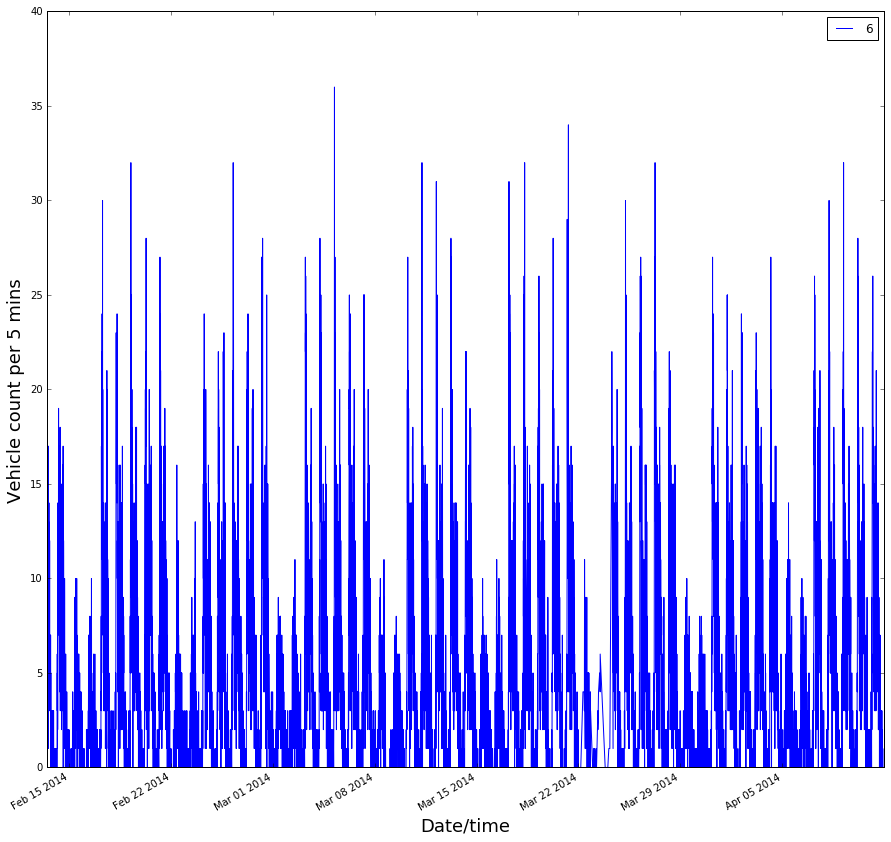

In [17]:
ax=df.plot(x=2,y=6,figsize=(15,15))
ax.set_ylabel('Vehicle count per 5 mins', fontsize=18)
ax.set_xlabel('Date/time', fontsize=18)

In [13]:
q="""
    select max(vehicleCount) from aarhus2 where ts > {t1} and ts < {t2}
    and status='OK' and extid='668';
"""
query=q.format(t1=startdate, t2=enddate)
print query
ds=c.ts_query('aarhus2', query)
#print ds
print ds.rows


    select max(vehicleCount) from aarhus2 where ts > 1392249600000 and ts < 1397260800000
    and status='OK' and extid='668';

[[36L]]


In [15]:
q="""
    select vehicleCount, ts from aarhus2 where ts > {t1} and ts < {t2}
    and status='OK' and extid='668' and vehicleCount>30;
"""
query=q.format(t1=startdate, t2=enddate)
#print query
ds=c.ts_query('aarhus2', query)
#print ds
for r in range(len(ds.rows)):
    print ds.rows[r]

[32L, datetime.datetime(2014, 2, 19, 5, 55)]
[32L, datetime.datetime(2014, 2, 26, 6, 40)]
[33L, datetime.datetime(2014, 3, 5, 5, 35)]
[36L, datetime.datetime(2014, 3, 5, 5, 40)]
[32L, datetime.datetime(2014, 3, 11, 6, 0)]
[31L, datetime.datetime(2014, 3, 12, 5, 40)]
[31L, datetime.datetime(2014, 3, 17, 5, 30)]
[32L, datetime.datetime(2014, 3, 18, 7, 20)]
[34L, datetime.datetime(2014, 3, 21, 7, 30)]
[32L, datetime.datetime(2014, 3, 27, 6, 25)]
[32L, datetime.datetime(2014, 4, 9, 5, 20)]


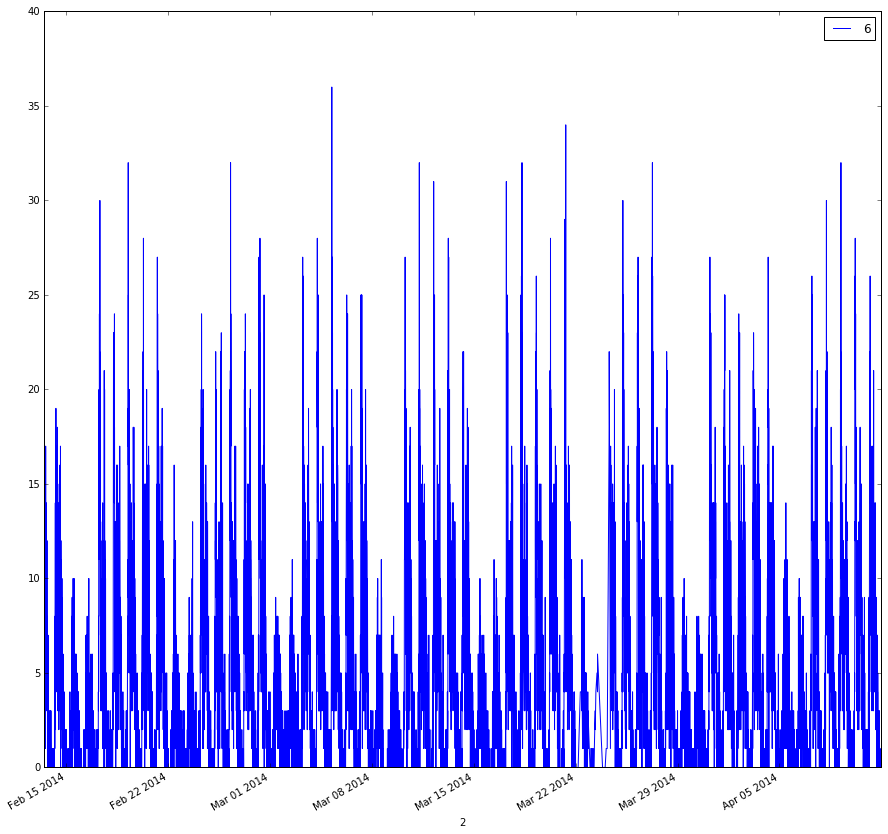

In [14]:
df.plot(x=2,y=6,figsize=(15,15))